/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


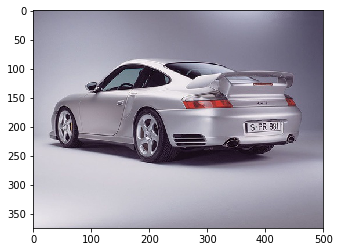

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Load the image from the source file
image_file = "../data/voc/automobile/000142.jpg"
image = mp_image.imread(image_file)

# Display it
plt.imshow(image)

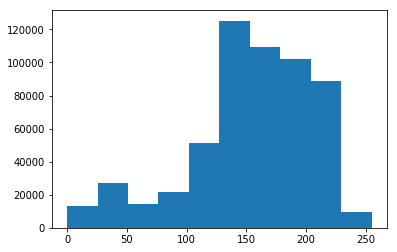

In [2]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(image.ravel())
plt.show()

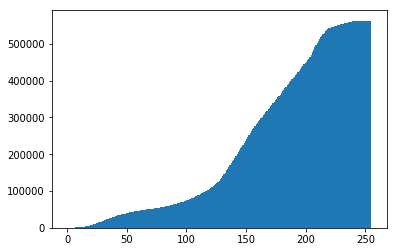

In [3]:
plt.hist(image.ravel(), bins=255, cumulative=True)
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


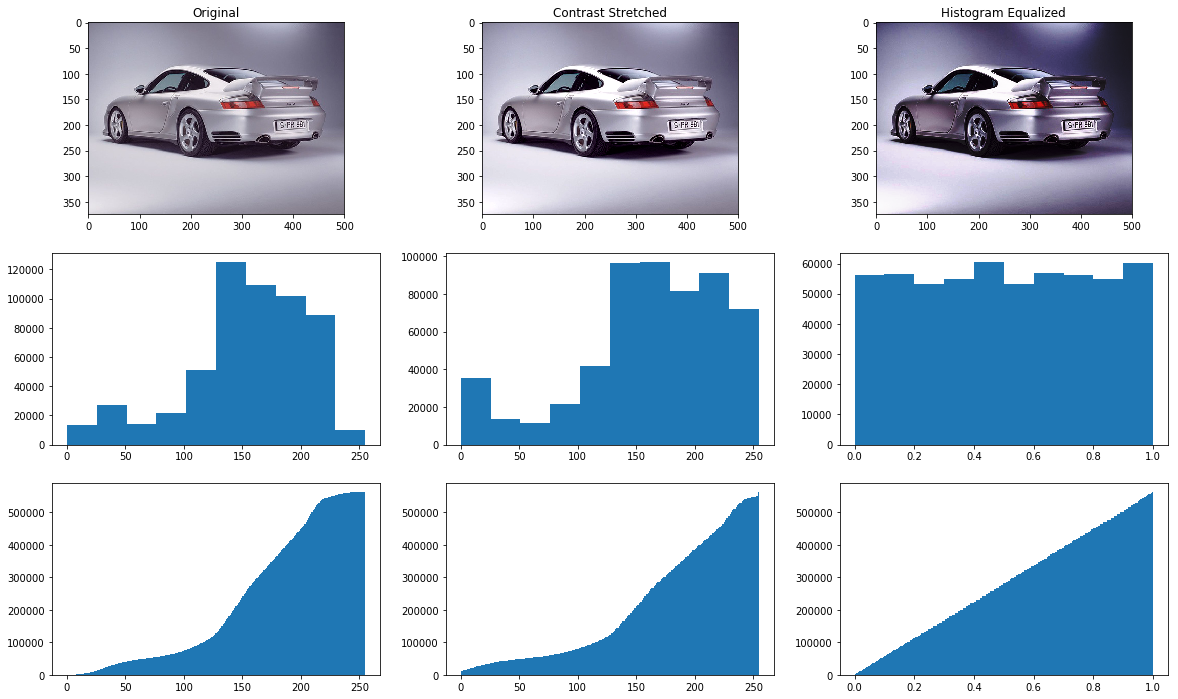

In [4]:
from skimage import exposure
import numpy as np

# Contrast stretching
p2 = np.percentile(image, 2)
p98 = np.percentile(image, 98)
image_ct = exposure.rescale_intensity(image, in_range=(p2, p98))

# Histogram Equalization
image_eq = exposure.equalize_hist(image)

# Show the images
fig = plt.figure(figsize=(20, 12))

# Subplot for original image
a=fig.add_subplot(3,3,1)
imgplot = plt.imshow(image)
a.set_title('Original')

# Subplot for contrast stretched image
a=fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_ct)
a.set_title('Contrast Stretched')

# Subplot for equalized image
a=fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title('Histogram Equalized')

# Subplots for histograms
a=fig.add_subplot(3,3,4)
imgplot = plt.hist(image.ravel())

a=fig.add_subplot(3,3,5)
imgplot = plt.hist(image_ct.ravel())

a=fig.add_subplot(3,3,6)
imgplot = plt.hist(image_eq.ravel())

# Subplots for CDFs

a=fig.add_subplot(3,3,7)
imgplot = plt.hist(image.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,8)
imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,9)
imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)

plt.show()

## Filters


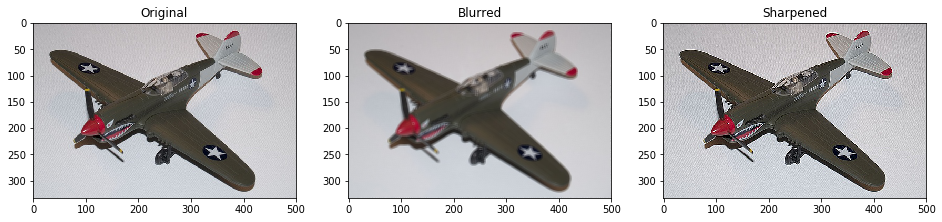

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Load the image from the source file
image_file = "../data/voc/plane/002279.jpg"
image = Image.open(image_file)

blurred_image = image.filter(ImageFilter.BLUR)
sharpened_image = image.filter(ImageFilter.SHARPEN)

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot blurred image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(blurred_image)
a.set_title("Blurred")

# Plot sharpened image
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(sharpened_image)
a.set_title("Sharpened")

plt.show()

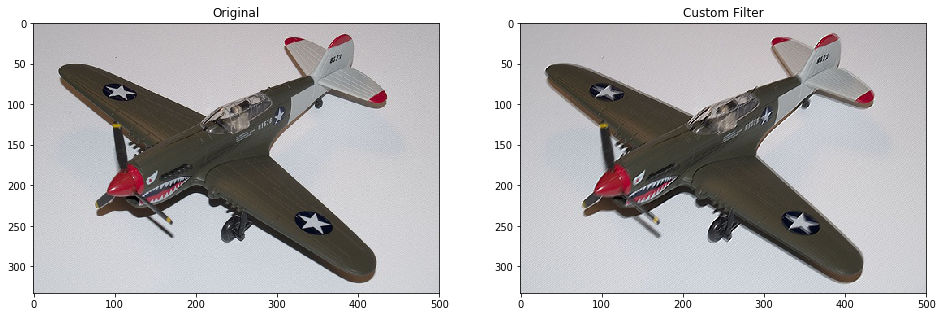

In [6]:
my_kernel = (200, 50, -100,
             -50, 200, -50,
            -100, 50, 200)

filtered_image = image.filter(ImageFilter.Kernel((3,3), my_kernel))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(filtered_image)
a.set_title("Custom Filter")

plt.show()

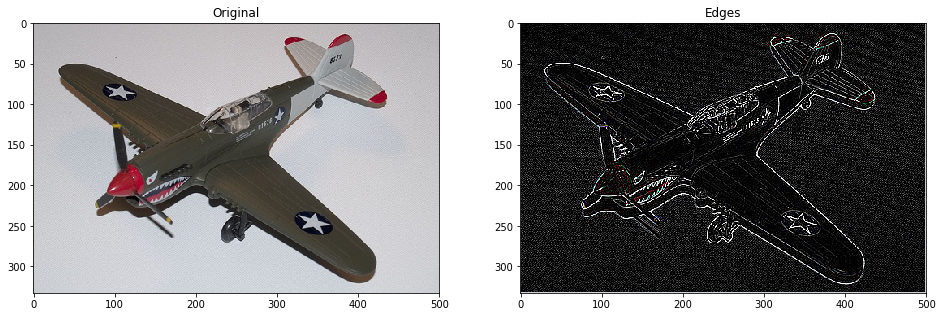

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Load the image from the source file
image_file = "../data/voc/plane/002279.jpg"
image = Image.open(image_file)

edges_image = image.filter(ImageFilter.FIND_EDGES)

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")

plt.show()

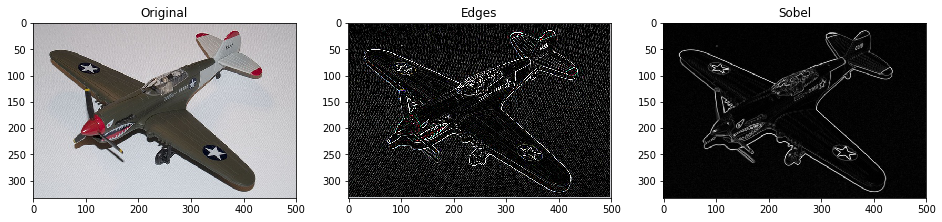

In [8]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

sobel_image = edge_sobel(np.array(image))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot PIL FIND_EDGES image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")

# Plot Sobel image
a=fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")

plt.show()

## Acknowledgements and Citations

The data used in this exercise includes images adapted from the PASCAL Visual Object Classes Challenge (VOC2007) dataset at http://host.robots.ox.ac.uk/pascal/VOC/voc2007/.


    @misc{pascal-voc-2007,
        author = "Everingham, M. and Van~Gool, L. and Williams, C. K. I. and Winn, J. and Zisserman, A.",
        title = "The {PASCAL} {V}isual {O}bject {C}lasses {C}hallenge 2007 {(VOC2007)} {R}esults",
        howpublished = "http://www.pascal-network.org/challenges/VOC/voc2007/workshop/index.html"}